# Introduction

Based on content discussed in the OpenCV Bootcamp from opencv.org

# Import libraries

In [1]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image, display

# Download Assets

In [2]:
def download_and_unzip(url, save_path):
    print("Downloading assets...")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")
    except Exception as e:
        print("\Invalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

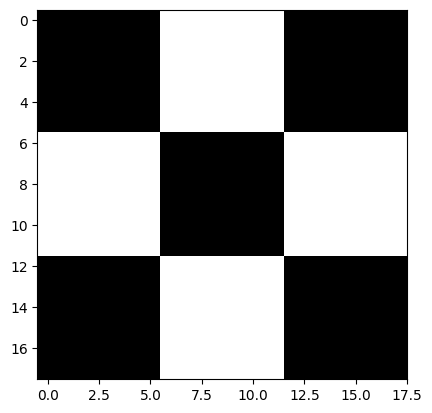

In [4]:
cb_image = cv2.imread("checkerboard_18x18.png", 0)

plt.imshow(cb_image, cmap="gray")
print(cb_image)

# Access individual pixels

In [5]:
print(cb_image[0,0])
print(cb_image[0,6])

0
255


# Modify pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 100 100   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 100 100   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

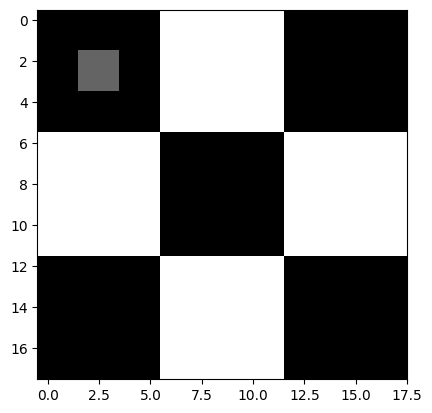

In [6]:
cb_image_copy = cb_image.copy()
cb_image_copy[2,2] = 100
cb_image_copy[2,3] = 100
cb_image_copy[3,2] = 100
cb_image_copy[3,3] = 100

plt.imshow(cb_image_copy, cmap="gray")
print(cb_image_copy)

# Cropping images

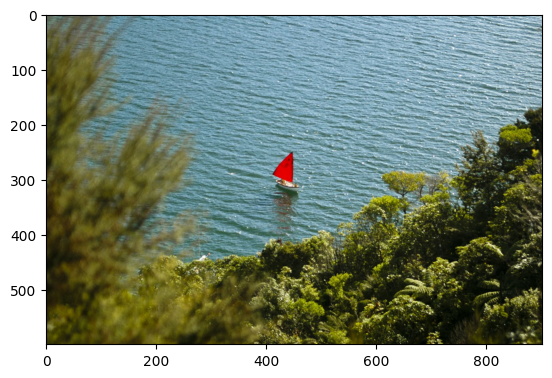

In [7]:
image_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
image_NZ_rgb = image_NZ_bgr[:, :, ::-1]

plt.imshow(image_NZ_rgb)

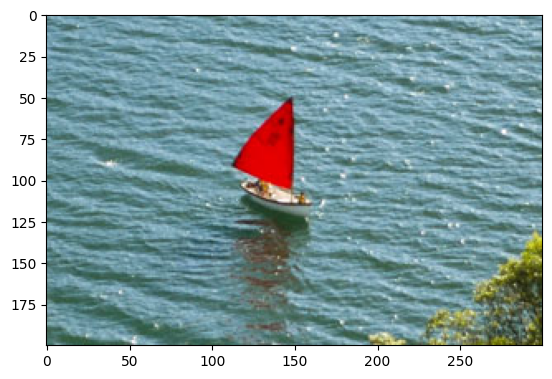

In [8]:
cropped_region = image_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

# Resizing images

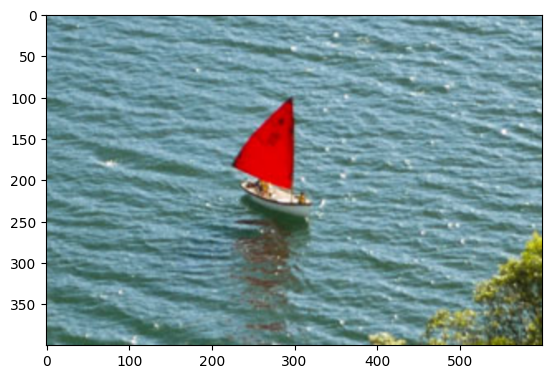

In [9]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

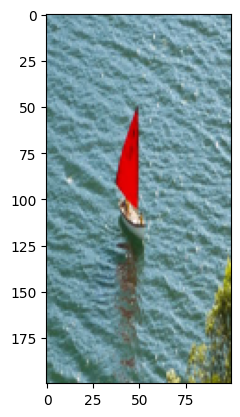

In [10]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

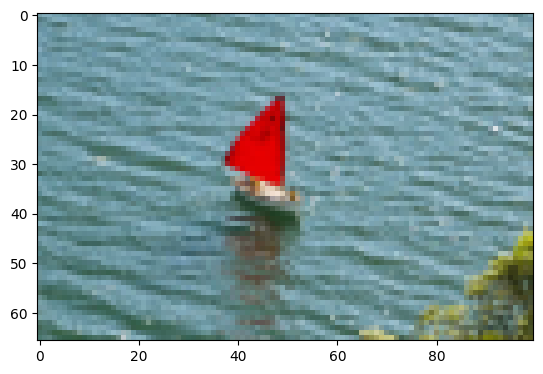

In [11]:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

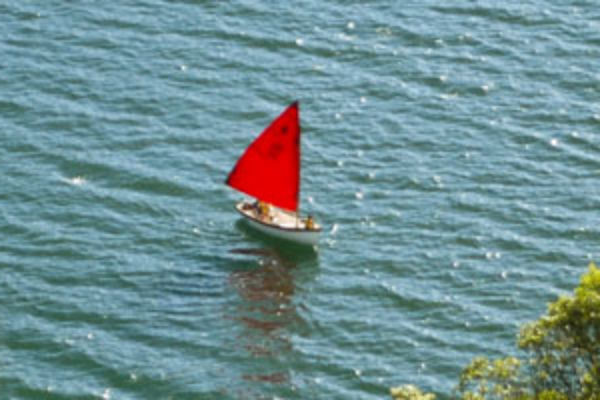

In [12]:
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)
Image(filename="resized_cropped_region_2x.png")

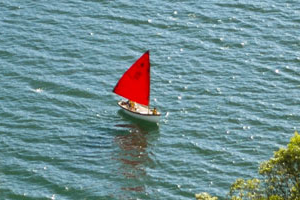

In [13]:
cropped_region = cropped_region[:, :, ::-1]
cv2.imwrite("cropped_region.png", cropped_region)
Image(filename="cropped_region.png")

# Flip images

Text(0.5, 1.0, 'Original')

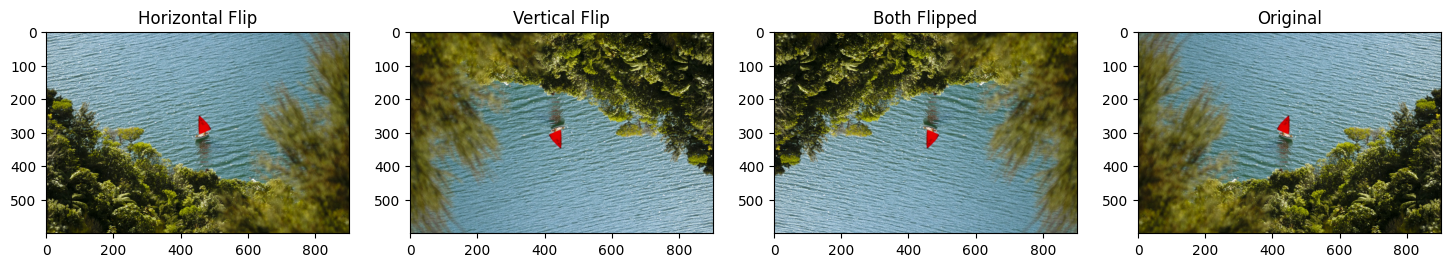

In [14]:
image_NZ_rgb_flipped_horiz = cv2.flip(image_NZ_rgb, 1)
image_NZ_rgb_flipped_vert = cv2.flip(image_NZ_rgb, 0)
image_NZ_rgb_flipped_both = cv2.flip(image_NZ_rgb, -1)

plt.figure(figsize=(18,5))

plt.subplot(141)
plt.imshow(image_NZ_rgb_flipped_horiz)
plt.title("Horizontal Flip")

plt.subplot(142)
plt.imshow(image_NZ_rgb_flipped_vert)
plt.title("Vertical Flip")

plt.subplot(143)
plt.imshow(image_NZ_rgb_flipped_both)
plt.title("Both Flipped")

plt.subplot(144)
plt.imshow(image_NZ_rgb)
plt.title("Original")